## 6.4 Regression

1.Import Libraries

2.Clean the data

3.Explore data Visually

4.State hypotheis

5.Reshape variables

6.Split Data into 2

7.Run linear regression a)Fit created training set
                        b)Create prediction for test set
                        
8.Create plot with Regression Line

9.Compare predicted values with actual

In [1]:
#1. Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
#2.Defining path ,importing dataset, and cleaning

# Defining Path
path=r'/Users/marieanek2/Documents/Youtube Trending Analysis'

In [3]:
# Importing Data set

df= pd.read_csv(os.path.join(path,'02 Data','Prepared Data','ALLvideos.csv'),index_col = False)

In [4]:
# Data Cleaning
df.columns

Index(['Unnamed: 0', 'country', 'channel_title', 'category_id', 'views',
       'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed'],
      dtype='object')

In [5]:
df.head(20)

,Unnamed: 0,country,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,US,CaseyNeistat,22,748374,57527,2966,15954,False,False,False
1,1,US,LastWeekTonight,24,2418783,97185,6146,12703,False,False,False
2,2,US,Rudy Mancuso,23,3191434,146033,5339,8181,False,False,False
3,3,US,Good Mythical Morning,24,343168,10172,666,2146,False,False,False
4,4,US,nigahiga,24,2095731,132235,1989,17518,False,False,False
5,5,US,iJustine,28,119180,9763,511,1434,False,False,False
6,6,US,Saturday Night Live,24,2103417,15993,2445,1970,False,False,False
7,7,US,CrazyRussianHacker,28,817732,23663,778,3432,False,False,False
8,8,US,20th Century Fox,1,826059,3543,119,340,False,False,False
9,9,US,Vox,25,256426,12654,1363,2368,False,False,False


In [6]:
df.shape

(304023, 11)

In [7]:
# Check for missing values

df.isnull().sum() #No Missing values

Unnamed: 0                0
country                   0
channel_title             0
category_id               0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [8]:
#Checking for duplicates
dups = df.duplicated()

In [9]:
dups.shape # No dups

(304023,)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

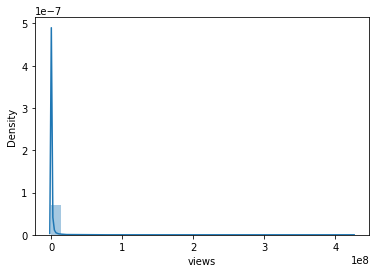

In [10]:
sns.distplot(df['views'], bins=30)

In [11]:
df['views'].mean() # Check the mean

1461772.9914940647

In [12]:
df['views'].median() # Check the median

174082.0

#### Prep Data for Regression

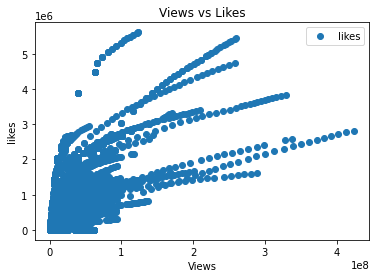

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'views', y='likes',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Views vs Likes')  
plt.xlabel('Views')  
plt.ylabel('likes')  
plt.show()

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['views'].values.reshape(-1,1)
y = df['likes'].values.reshape(-1,1)

In [15]:
X

array([[ 748374],
       [2418783],
       [3191434],
       ...,
       [  47510],
       [  78117],
       [  46604]])

In [16]:
y

array([[ 57527],
       [ 97185],
       [146033],
       ...,
       [  4601],
       [   244],
       [   947]])

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression Analysis

In [18]:
# Create a regression object.

regression = LinearRegression()  

In [19]:
# Fitting regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predicting  values of y using X.

y_predicted = regression.predict(X_test)

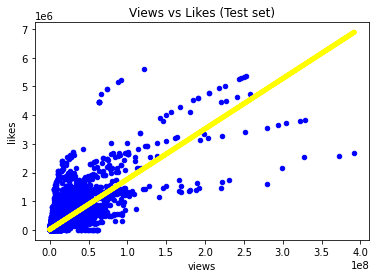

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 20)
plot_test.plot(X_test, y_predicted, color='yellow', linewidth =5)
plot_test.title('Views vs Likes (Test set)')
plot_test.xlabel('views')
plot_test.ylabel('likes')
plot_test.show()

In [22]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [23]:
# summary statistics, evaluating  performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01752921]]
Mean squared error:  11325915420.703167
R2 score:  0.6290993434259256


In [24]:
y_predicted

array([[16897.31459669],
       [38968.62963898],
       [51164.16025658],
       ...,
       [18394.39720162],
       [16943.83713323],
       [61752.70009136]])

In [25]:
# Data frame comparing  actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,22,16897.314597
1,54022,38968.629639
2,79387,51164.160257
3,132482,57887.823715
4,623,19076.055784
5,4199,18288.415568
6,1508,24905.711750
7,170939,51034.461595
8,816,20751.024863
9,6941,18834.047442


In [26]:
# Predicting 

y_predicted_train = regression.predict(X_train)

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01752921]]
Mean squared error:  12531770257.489836
R2 score:  0.5984951653033463


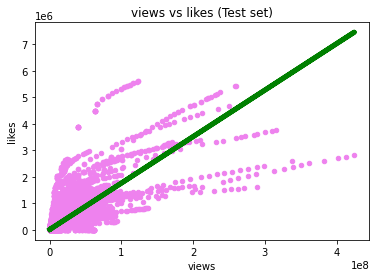

In [29]:
# Visualization for  the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='violet', s = 20)
plot_test.plot(X_train, y_predicted_train, color='green', linewidth =5)
plot_test.title('views vs likes (Test set)')
plot_test.xlabel('views')
plot_test.ylabel('likes')
plot_test.show()

We can see that there is a high correlation between the number of likes on a video and the number of views. Also an interesting note: likes and comment count has an incredibly high correlation in Japan, Japan also has a weirdly high correlation between dislikes, likes and views (one could also rephrase this to a high correlation between reactions and views). There are other interesting little tidbits in the data.

(obligatory correlation =/= causation speil)Without seeing this data in timelapse one couldn't determine if a particular variable is the cause of the other. For instance: are videos that are watched frequently more likely to be liked by a viewer, or does a video receiving a large number of likes cause it to be recommended frequently. Or perhaps neither is the cause of the other and perhaps some confounding variable is the cause of both of these.